In [1]:
%autosave 60
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50

Autosaving every 60 seconds


Using TensorFlow backend.


### import the MNIST dataset

In [8]:
number_of_classes = 10
# x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
# y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
#convert grayscale into value between 0 and 1
x_train = x_train/255
x_test = x_test/255

#convert the classification label into binary class matrix-size 1x10
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)



### Multilayer perceptron(MLP)

In [3]:
#The Sequential model is a linear stack of layers.
model = Sequential() 
#only the first layer in Sequential model needs input shape.
#ReLU(Rectified Linear Unit)is used in almost all the convolutional neural networks
#f(x)=max(x,0)
model.add(Dense(512, activation='relu', input_shape=(784,)))#add layers
#Dropout is a regularization technique for reducing overfitting 
#in neural networks by preventing complex co-adaptations on training data.
model.add(Dropout(0.2)) #drop 20% of input units
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(number_of_classes, activation='softmax'))
#to print a summary representation of your model. 
model.summary()

#Configure the model for training
model.compile(optimizer=RMSprop(), #recurrent neural networks
              loss='categorical_crossentropy',
              metrics=['accuracy']) 
#A metric is used to judge the performance of the model. 

#Train the model for a given number of epochs (iterations on a dataset).
#batch_size: Number of samples per gradient update
batch_size = 512
#epochs:Number of epochs to train the model. 
#An epoch is an iteration over the entire x and y data provided.
epochs = 20
#validation_data:  evaluate the loss and any model metrics at the end of each epoch
#The model will not be trained on this data. 
fit_model = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.10)
#Return the loss value & metrics values for the model in test mode.
#Computation is done in batches.
performance = model.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
17920/54000 [========>.....................] - ETA: 4s - loss: 0.6955 - acc:

/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.001953125). Is this intended?
  force_init=force_init)


54000/54000 [==============================] - 3s 51us/step - loss: 0.4131 - acc: 0.8728 - val_loss: 0.1368 - val_acc: 0.9587
Epoch 2/20
54000/54000 [==============================] - 1s 9us/step - loss: 0.1568 - acc: 0.9520 - val_loss: 0.1059 - val_acc: 0.9698
Epoch 3/20
54000/54000 [==============================] - 0s 8us/step - loss: 0.1066 - acc: 0.9666 - val_loss: 0.0776 - val_acc: 0.9762
Epoch 4/20
54000/54000 [==============================] - 0s 8us/step - loss: 0.0778 - acc: 0.9755 - val_loss: 0.0730 - val_acc: 0.9770
Epoch 5/20
54000/54000 [==============================] - 0s 8us/step - loss: 0.0614 - acc: 0.9813 - val_loss: 0.0700 - val_acc: 0.9788
Epoch 6/20
54000/54000 [==============================] - 1s 10us/step - loss: 0.0506 - acc: 0.9834 - val_loss: 0.0846 - val_acc: 0.9732
Epoch 7/20
54000/54000 [==============================] - 1s 10us/step - loss: 0.0411 - acc: 0.9867 - val_loss: 0.0703 - val_acc: 0.9802
Epoch 8/20
54000/54000 [==============================] 

### plot the training loss and validation loss

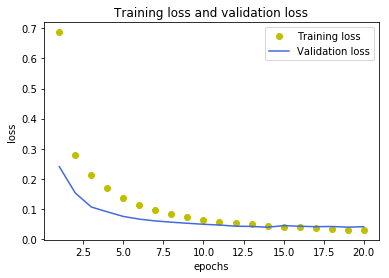

In [17]:
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'yo', label='Training loss')
plt.plot(epochs, val_loss, 'royalblue', label='Validation loss')
plt.title('Training loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### plot the training accuracy and validation accuracy

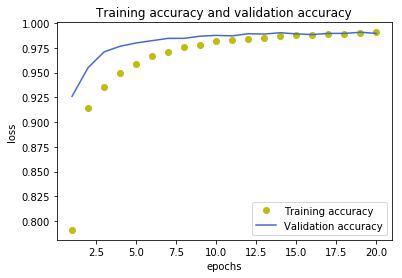

In [16]:
plt.clf()
acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
plt.plot(epochs, acc, 'yo', label='Training accuracy')
plt.plot(epochs, val_acc, 'royalblue', label='Validation accuracy')
plt.title('Training accuracy and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### convolutional neural network(CNN)

In [22]:
%%time
# dimension of the input images 
row_num = 28
col_num = 28
x_train = x_train.reshape(np.shape(x_train)[0], 1, row_num, col_num)
x_test = x_test.reshape(np.shape(x_test)[0], 1, row_num, col_num)
input_shape = (1,row_num, col_num)

model = Sequential()
#This layer creates a convolution kernel that is convolved with 
#the layer input to produce a tensor of outputs.
model.add(Conv2D(64, #filters(Integer):the dimension of the output space 
                 kernel_size=(2, 2),#the height and width of the 2D convolution window
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (2, 2), activation='relu'))
#(2, 2) will halve the input in both spatial dimension. 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#Return a copy of the array collapsed into one dimension.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= RMSprop(),
              metrics=['accuracy'])

fit_model_cnn = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=20,
                    verbose=1,
                    validation_split=0.10)
performance = model.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
 1536/54000 [..............................] - ETA: 6s - loss: 2.1972 - acc: 0.1875

/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.001953125). Is this intended?
  force_init=force_init)


54000/54000 [==============================] - 5s 93us/step - loss: 0.5244 - acc: 0.8357 - val_loss: 0.1536 - val_acc: 0.9583
Epoch 2/20
54000/54000 [==============================] - 5s 93us/step - loss: 0.1381 - acc: 0.9593 - val_loss: 0.0632 - val_acc: 0.9823
Epoch 3/20
54000/54000 [==============================] - 5s 92us/step - loss: 0.0871 - acc: 0.9730 - val_loss: 0.0547 - val_acc: 0.9848
Epoch 4/20
54000/54000 [==============================] - 5s 92us/step - loss: 0.0666 - acc: 0.9800 - val_loss: 0.0496 - val_acc: 0.9852
Epoch 5/20
54000/54000 [==============================] - 5s 92us/step - loss: 0.0540 - acc: 0.9833 - val_loss: 0.0435 - val_acc: 0.9890
Epoch 6/20
54000/54000 [==============================] - 5s 92us/step - loss: 0.0455 - acc: 0.9857 - val_loss: 0.0412 - val_acc: 0.9877
Epoch 7/20
54000/54000 [==============================] - 5s 92us/step - loss: 0.0397 - acc: 0.9876 - val_loss: 0.0366 - val_acc: 0.9903
Epoch 8/20
54000/54000 [============================

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 27, 27)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 26, 26)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 13, 13)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 13, 13)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               5538048   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
__________

### plot the training loss and validation loss

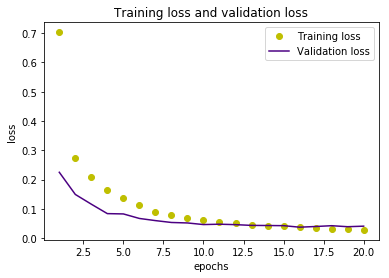

In [19]:
loss = fit_model_cnn.history['loss']
val_loss = fit_model_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'yo', label='Training loss')
plt.plot(epochs, val_loss, 'indigo', label='Validation loss')
plt.title('Training loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### plot the training accuracy and validation accuracy

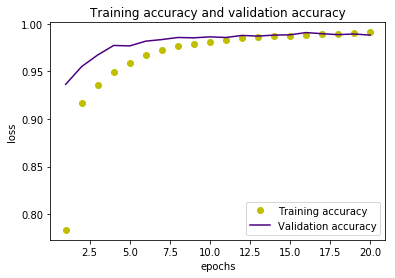

In [20]:
plt.clf()
acc = fit_model_cnn.history['acc']
val_acc = fit_model_cnn.history['val_acc']
plt.plot(epochs, acc, 'yo', label='Training accuracy')
plt.plot(epochs, val_acc, 'indigo', label='Validation accuracy')
plt.title('Training accuracy and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [4]:
number_of_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255

row_num = 28
col_num = 28

x_train = x_train.reshape(np.shape(x_train)[0], row_num, col_num,1)
x_test = x_test.reshape(np.shape(x_test)[0], row_num, col_num,1)
input_shape = (row_num, col_num,1)

print(np.shape(x_train))
#convert the classification label into binary class matrix-size 1x10
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)


conv_base = ResNet50(weights = 'imagenet',
                  include_top = False,
                  input_shape=input_shape)
#conv_base.summary()

model_resnet = Sequential()
model_resnet.add(conv_base)
model_resnet.add(Flatten())
model_resnet.add(Dense(128,activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(number_of_classes,activation='softmax'))

print('The number of trainable weights before conv_base is frozen:', len(model_resnet.trainable_weights))
# avoid the weights from pretrained model are modified during training 
conv_base.trainable = False
print('The number of trainable weights after conv_base is frozen:', len(model_resnet.trainable_weights))

model_resnet.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
fit_model=model_resnet.fit(x_train, y_train,
                    steps_per_epoch=32,validation_steps=50,epochs=100,verbose=1,
                    validation_data=validation_generator)
performance = model_resnet.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

(60000, 28, 28, 1)


ValueError: The input must have 3 channels; got `input_shape=(28, 28, 1)`